In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D as ax

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Linear Regression/winequality-red.csv')

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# INPUTS
features_to_select = ['fixed acidity', 'volatile acidity']
X = data[features_to_select]
# OUTPUT
Y = data['quality']

# For Visualzation Purpose
X1 = data['fixed acidity']
X2 = data['volatile acidity']

In [6]:
m = len(Y)
n = len(X)
print(m,n)

1599 1599


In [7]:
print(X)
print(Y)

      fixed acidity  volatile acidity
0               7.4             0.700
1               7.8             0.880
2               7.8             0.760
3              11.2             0.280
4               7.4             0.700
...             ...               ...
1594            6.2             0.600
1595            5.9             0.550
1596            6.3             0.510
1597            5.9             0.645
1598            6.0             0.310

[1599 rows x 2 columns]
0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [8]:
# Converting the table to arrays, Example, X->Table, x->Array

# X['intercept'] = 1
X = np.c_[np.ones(X.shape[0]),X]    # Add a column names 'intercept' at 0th location with all values set to 1
x = np.array(X)
y = np.array(Y)

theta = np.random.rand(3)   # Y = (theta_0 * x[0]) + (theta_1 * x[1]) + (theta_2 * x[2])

In [9]:
print("\tx[0]\t", "x[1]\t", "x[2]\t")
x

	x[0]	 x[1]	 x[2]	


array([[1.   , 7.4  , 0.7  ],
       [1.   , 7.8  , 0.88 ],
       [1.   , 7.8  , 0.76 ],
       ...,
       [1.   , 6.3  , 0.51 ],
       [1.   , 5.9  , 0.645],
       [1.   , 6.   , 0.31 ]])

In [10]:
x[0]

array([1. , 7.4, 0.7])

In [11]:
x[:,1]  # Column 2 of X Array having X1 Feature

array([7.4, 7.8, 7.8, ..., 6.3, 5.9, 6. ])

In [12]:
x[:,2]

array([0.7  , 0.88 , 0.76 , ..., 0.51 , 0.645, 0.31 ])

In [13]:
y

array([5, 5, 5, ..., 6, 5, 6])

In [14]:
theta

array([0.94059233, 0.93771021, 0.06468739])

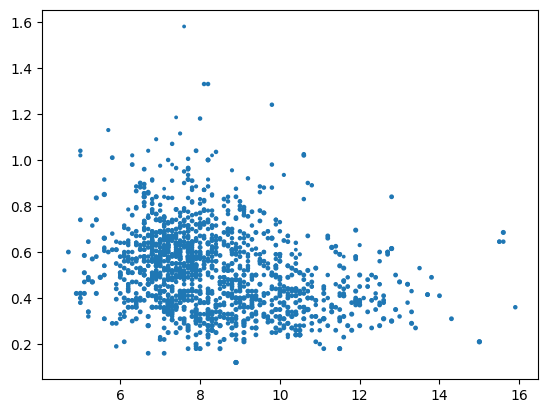

In [15]:
plt.scatter(X1, X2, Y)

Text(0.5, 0.5, 'X2 (Volatile Acdity)')

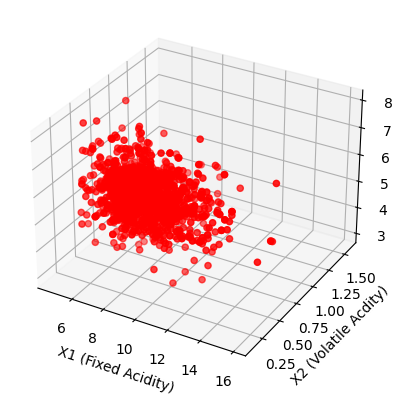

In [16]:
# Plotting a 3D Grapg - two features(X1, X2), one output(Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot together
ax.scatter(X1, X2, Y ,c='r', marker='o')

# # With different color
# ax.scatter(X1, Y, c='blue', marker='o', label='X1')
# ax.scatter(X2, Y, c='green', marker='x', label='X2')

ax.set_xlabel('X1 (Fixed Acidity)')
ax.set_ylabel('X2 (Volatile Acdity)')

In [17]:
print(x.shape)
print(theta.shape)

(1599, 3)
(3,)


In [18]:
theta = np.random.rand(3) # Since we have 2 input features, we'll have a 3D graph and thus theta0, theta1 and theta 2

In [19]:
def gradient_descent(x ,y , theta, iterations, L):
  past_costs = []
  past_thetas = [theta]
  for i in range(iterations):
    prediction = np.dot(x, theta)
    error = prediction - y
    cost = 1/(2*m) * np.dot(error.T, error)   # Cost Function
    past_costs.append(cost)
    theta = theta - (L * (1/m) * np.dot(x.T, error))
    past_thetas.append(theta)

  return past_thetas, past_costs

In [20]:
# prediction = (np.dot(x, theta))
prediction1 = np.dot(x, theta)
# prediction2 = np.dot(x[1], theta)
# prediction3 = np.dot(x[2], theta)
# prediction = prediction1 + prediction2 + prediction3
prediction1.shape

(1599,)

In [21]:
L = 0.001
iterations = 500000
past_theta, past_costs = gradient_descent(x, y, theta, iterations, L)
theta = past_theta[-1]
print(theta[0], theta[1], theta[2])

6.449008605538891 0.012045164802776901 -1.730184850622339


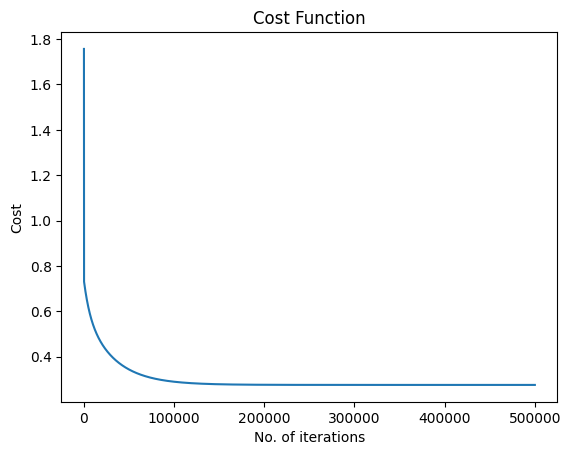

In [22]:
# Plotting the cost function
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)

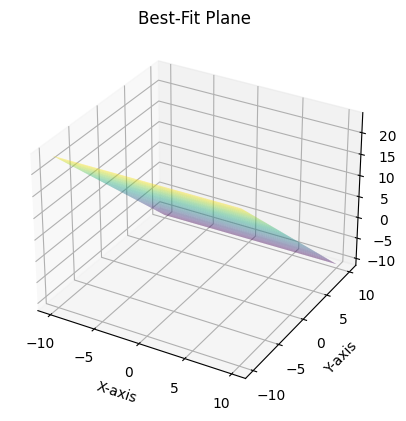

In [23]:
# Generate data for the best-fit plane
best_fit_x = np.linspace(-10, 10, 100)
best_fit_y = np.linspace(-10, 10, 100)
best_fit_x, best_fit_y = np.meshgrid(best_fit_x, best_fit_y)
best_fit_z = theta[0] + theta[1] * best_fit_x + theta[2] * best_fit_y

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the best-fit plane
ax.plot_surface(best_fit_x, best_fit_y, best_fit_z, alpha=0.5, cmap='viridis')

# Add labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.title('Best-Fit Plane')

# Show the plot
plt.show()

In [ ]:
def accuracy(x, y, theta, iterations, L):
  for i in range(iterations):
    predicted_y = np.dot(x, theta)

  mean_y = sum(y)/len(y)  # Find mean of observed y

  # sst = sum((yi - mean_y)**2 for yi in y)
  # ssr = sum((y[i] - predicted_y)**2)
  sst = sum((y - mean_y)**2)
  ssr = sum((y - predicted_y)**2)
  # print("Y : \n", y, "\n\n")
  # print("Predicted_t : ",predicted_y, "\n\n")
  # print("SSR : \n", ssr)

  r2 = 1 - (ssr/sst)

  print(f"R-squared value : {r2}")

  return r2
